In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json('loan_approval_dataset.json')

print(data.head())

print(data.info())
print(data.describe())

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

In [2]:
data = data.drop_duplicates()

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

for col in categorical_cols:
    data[col] = data[col].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Id                 252000 non-null  int64   
 1   Income             252000 non-null  int64   
 2   Age                252000 non-null  int64   
 3   Experience         252000 non-null  int64   
 4   Married/Single     252000 non-null  category
 5   House_Ownership    252000 non-null  category
 6   Car_Ownership      252000 non-null  category
 7   Profession         252000 non-null  category
 8   CITY               252000 non-null  category
 9   STATE              252000 non-null  category
 10  CURRENT_JOB_YRS    252000 non-null  int64   
 11  CURRENT_HOUSE_YRS  252000 non-null  int64   
 12  Risk_Flag          252000 non-null  int64   
dtypes: category(6), int64(7)
memory usage: 17.1 MB
None


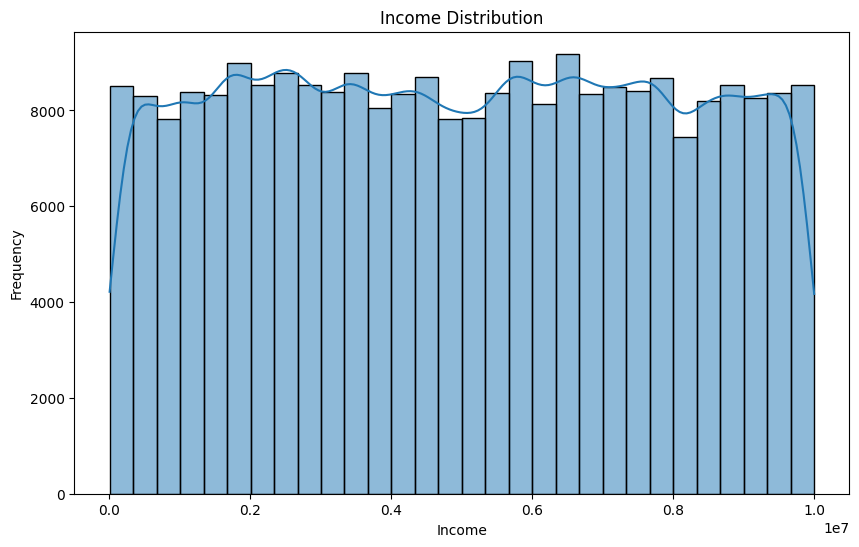

In [3]:
#Distribution of Income
plt.figure(figsize=(10,6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

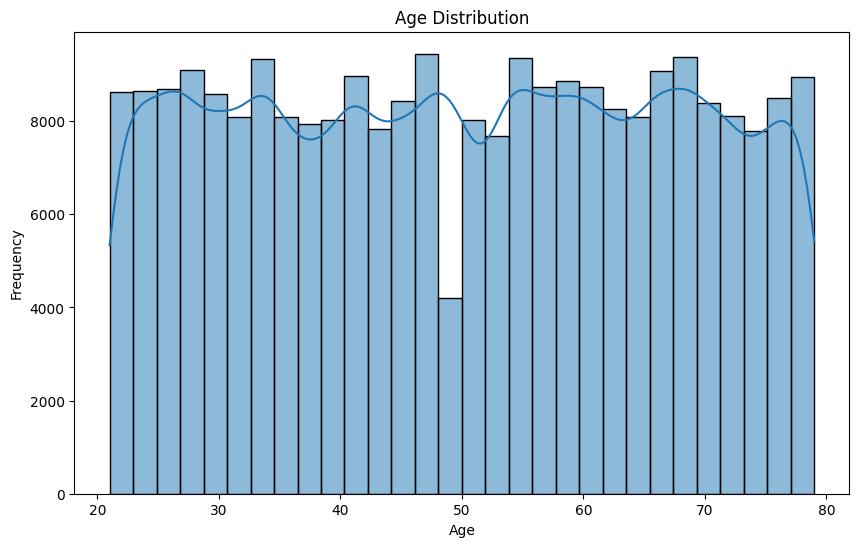

In [4]:
#Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

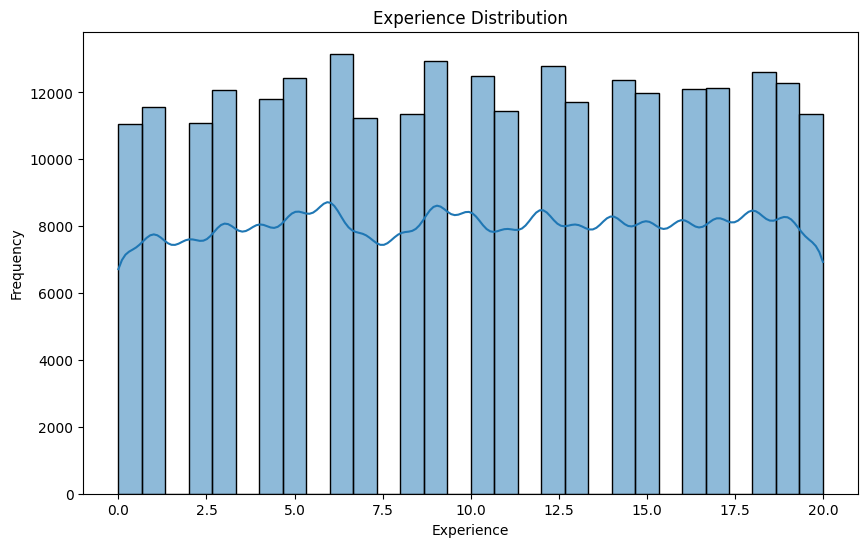

In [5]:
#Experience Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Experience'], bins=30, kde=True)
plt.title('Experience Distribution')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

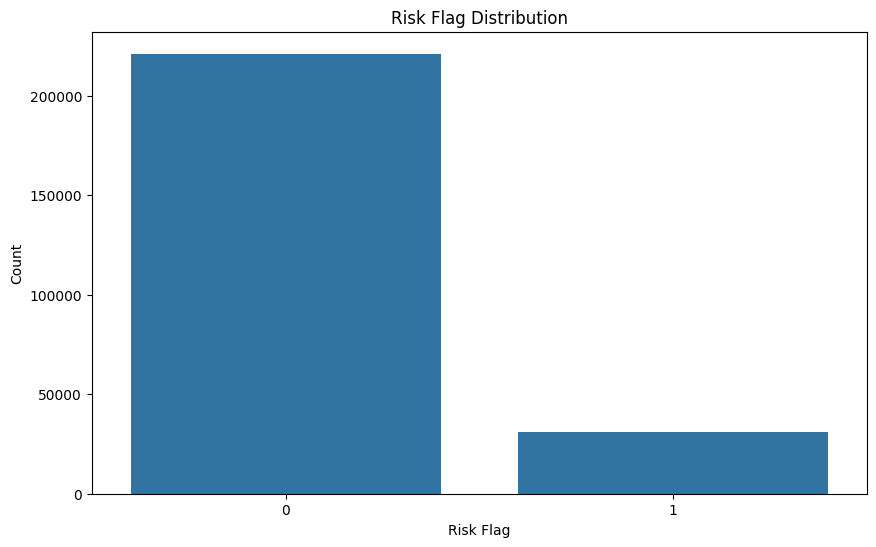

In [7]:
#Risk Flag Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=data, x = 'Risk_Flag')
plt.title('Risk Flag Distribution')
plt.xlabel('Risk Flag')
plt.ylabel('Count')
plt.show()

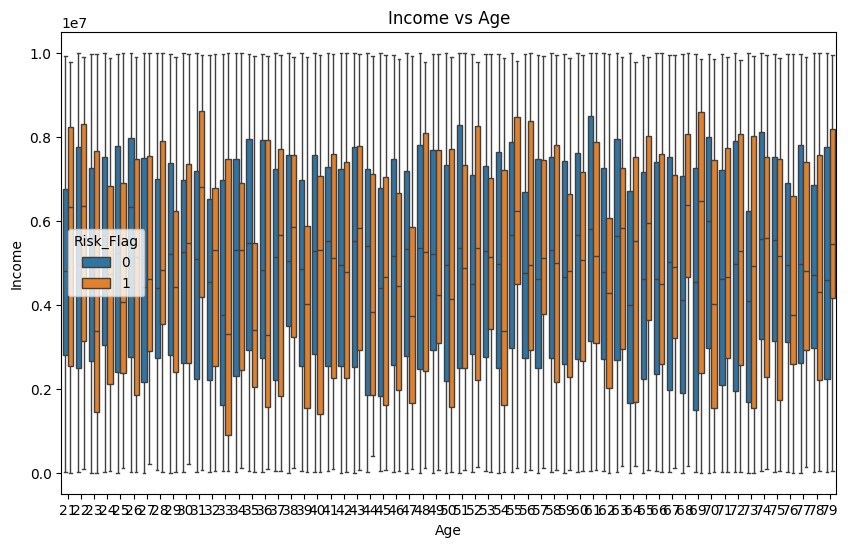

In [8]:
#Income vs Age
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Age',y='Income',hue='Risk_Flag')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

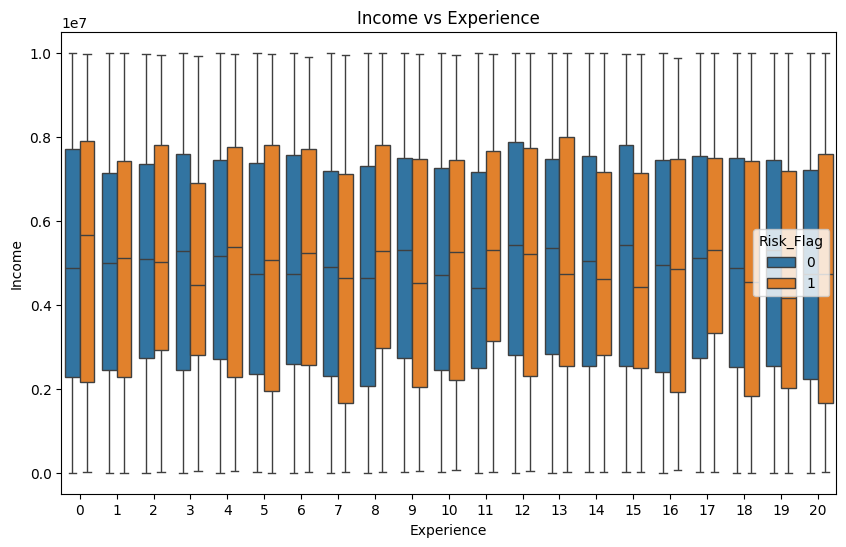

In [9]:
#Income vs Experience
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Experience',y='Income',hue='Risk_Flag')
plt.title('Income vs Experience')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.show()

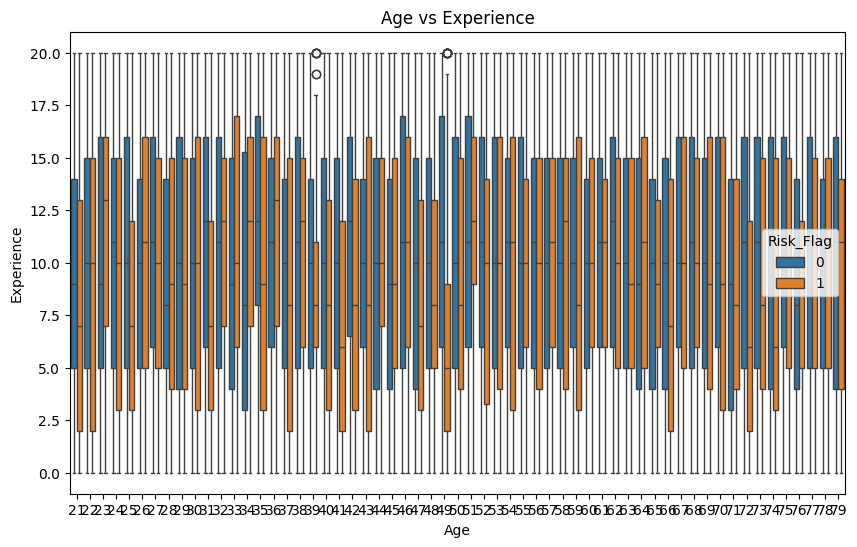

In [10]:
#Age vs Experience
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Age',y='Experience',hue='Risk_Flag')
plt.title('Age vs Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.show()

In [11]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])
data['Income_per_Experience'] = data['Income']/(data['Experience']+1)
data['High_Income'] = (data['Income']>data['Income'].median()).astype(int)

data = pd.get_dummies(data, drop_first=True)

print(data.head())

   Id   Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0   1  1303834   23           3                3                 13   
1   2  7574516   40          10                9                 13   
2   3  3991815   66           4                4                 10   
3   4  6256451   41           2                2                 12   
4   5  5768871   47          11                3                 14   

   Risk_Flag  Income_per_Experience  High_Income  Married/Single_single  ...  \
0          0           3.259585e+05            0                   True  ...   
1          0           6.885924e+05            1                   True  ...   
2          0           7.983630e+05            0                  False  ...   
3          1           2.085484e+06            1                   True  ...   
4          1           4.807392e+05            1                   True  ...   

   STATE_Sikkim  STATE_Tamil_Nadu  STATE_Telangana  STATE_Tripura  \
0         False        

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(201600, 408) (50400, 408)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

Training Accuracy: 0.9999652777777778
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    176857
           1       1.00      1.00      1.00     24743

    accuracy                           1.00    201600
   macro avg       1.00      1.00      1.00    201600
weighted avg       1.00      1.00      1.00    201600

Testing Accuracy: 0.9016666666666666
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     44147
           1       0.64      0.46      0.54      6253

    accuracy                           0.90     50400
   macro avg       0.79      0.71      0.74     50400
weighted avg       0.89      0.90      0.89     50400

Confusion Matrix:
 [[42542  1605]
 [ 3351  2902]]


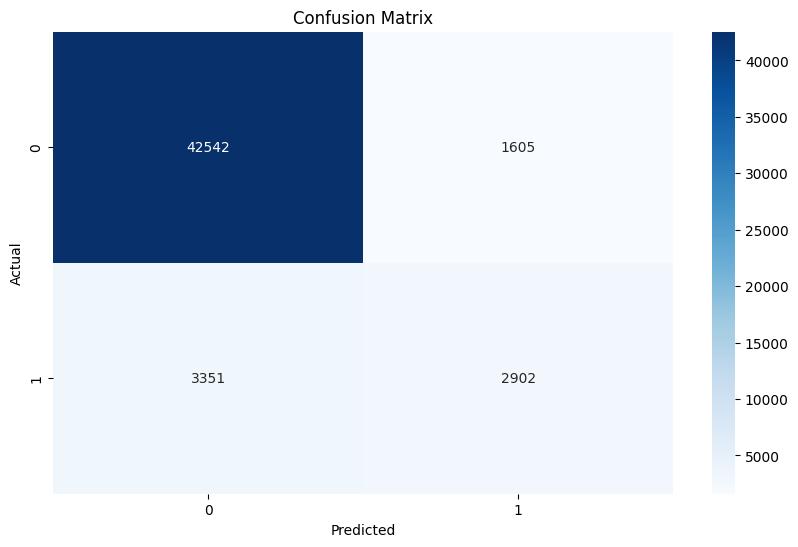

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Training performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))

# Testing performance
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)

print("Final Model Testing Accuracy:", accuracy_score(y_test, y_pred_final))
print("Final Model Classification Report:\n", classification_report(y_test, y_pred_final))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Final Model Testing Accuracy: 0.9045039682539683
Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     44147
           1       0.68      0.43      0.53      6253

    accuracy                           0.90     50400
   macro avg       0.80      0.70      0.74     50400
weighted avg       0.89      0.90      0.89     50400

